In [11]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [12]:
#jo var and outputs we need to discard we take it in "_"
X, _ = make_blobs(n_samples=1000, centers=5,random_state=4)
print(X.shape)

(1000, 2)


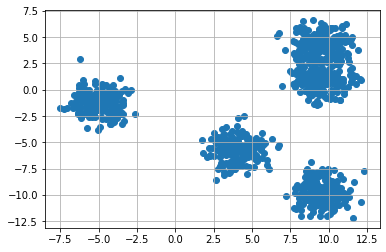

In [16]:
plt.figure()
plt.grid(True)
plt.scatter(X[:,0],X[:,1]) #it is unsupervised learning algo so we will make use of only x values and not the y value
plt.show()

In [17]:
k = 5 # number of cluster

colors = ['pink','blue','green','red','orange'] #creating list of colors, jisse hum harr cluster ko color assign kr sake

clusters = {} #dictionary of cluster, it is an empty dictionary

for ix in range(k): # iterate over range k
    center = 10.0*(2*np.random.random( (X.shape[1],) ) -1 ) #initialising random centre for each cluster
    #np.random generate value from 0 to 1 multiply it by 2 we get 0 to 2 then subtract 1 we get -1 to 1 then multiply by 10 we get the range of -10 to 10
    points = [] #assignment list
    
    #with each cluster center we will assign list
    cluster = {
        "center" : center,
        "points" : points,
        "color" : colors[ix]
    }
    
    clusters[ix] = cluster
    
print(clusters) 

{0: {'center': array([-3.99248113,  3.64996967]), 'points': [], 'color': 'pink'}, 1: {'center': array([0.19137786, 9.26700885]), 'points': [], 'color': 'blue'}, 2: {'center': array([0.50390406, 2.24086565]), 'points': [], 'color': 'green'}, 3: {'center': array([-1.84907422,  6.48227115]), 'points': [], 'color': 'red'}, 4: {'center': array([-1.63627533, -5.70269581]), 'points': [], 'color': 'orange'}}


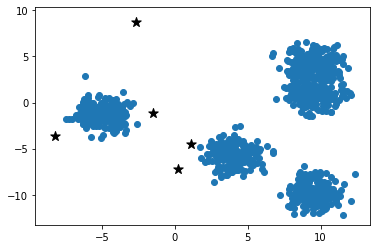

In [49]:
plt.figure()
plt.scatter(X[:,0],X[:,1])
for ix in range(k):
    plt.scatter(clusters[ix]["center"][0], clusters[ix]["center"][1], color="black", marker="*", s=100)
plt.show()

In [50]:
def distance(v1,v2):
    return np.sqrt(np.sum( (v1-v2)**2 ) )

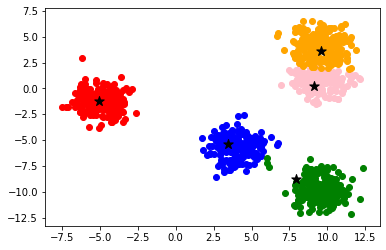

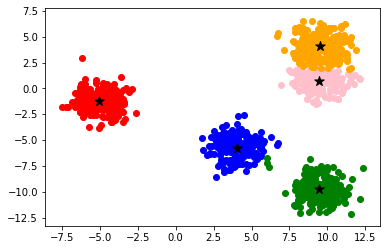

In [54]:
#Assign every data point to one of the clusters
def assignPointToClusters(clusters): #E- step 
    for ix in range(X.shape[0]): #iterate over all the data points
        dis = []
        curr_p = X[ix]
        #compute the distance of curr data point from all data point
        for kx in range(k):
            d = distance(curr_p, clusters[kx]["center"])
            dis.append(d) #append the distance in distance array

        assined_cluster = np.argmin(dis) #choosing cluster with minimum distance
        clusters[assined_cluster]["points"].append(curr_p)


#def updateClusters(clusters): #M-step        
for kx in range(k):
    pnts = np.array(clusters[kx]["points"])
    
    clusters[kx]["coords"] = pnts
    
plt.figure(0)
for kx in range(k):
    pts = clusters[kx]["coords"]
    
    try: 
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]["color"]) #all the pts 0th feature, and all the points 1st feature and pass the cluster and its color
    except:
        pass
    
    plt.scatter(clusters[kx]["center"][0], clusters[kx]["center"][1], color = "black", marker = "*", s=100)
    

for kx in range(k):
    
    if clusters[kx]["coords"].shape[0]>0: #if cluster has non zero points then take the mean and update that cluster
        new_center = clusters[kx]["coords"].mean(axis=0) #taking mean along 0th axis
    else:
        new_center = clusters[kx]["center"] 
        
    clusters[kx]["center"] = new_center #update the centre
    clusters[kx]["points"] = [] #empty the list, clear the list
    
plt.figure(1)
for kx in range(k):
    pts = clusters[kx]["coords"]
    
    try:
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]["color"])
    except:
        pass
    
    plt.scatter(clusters[kx]["center"][0], clusters[kx]["center"][1], color = "black", marker = "*", s=100)
    
plt.show()  

# SKLEARN

In [55]:
from sklearn.cluster import KMeans

In [56]:
#first step is always creating an obj

kmeans = KMeans(n_clusters=5)

In [57]:
z = kmeans.fit_transform(X)

In [59]:
cen = kmeans.cluster_centers_

In [60]:
Y = kmeans.labels_

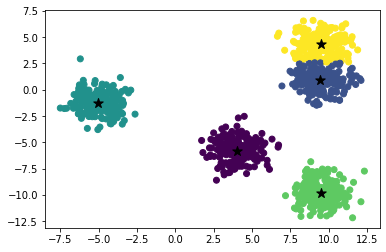

In [63]:
plt.figure()

plt.scatter(X[:,0],X[:,1], c = Y)
plt.scatter(cen[:,0], cen[:,1], marker="*",s=100,color='black')
plt.show()